Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading Train 60000.cdb ...
Train Dataset Loaded
Reading Test 20000.cdb ...
Test Dataset Loaded
[7963, 4190, 15343, 18046, 8485, 9850, 15703, 8740, 9543, 7383, 15220, 6991, 4095, 19103, 4378, 11241, 7915, 15238, 14629, 7724, 4225, 14783, 15730, 10600, 3860, 2370, 8748, 1893, 3362, 8294, 12309, 16484, 108, 2920, 15022, 14312, 10186, 1980, 8341, 11291, 3911, 13072, 7110, 8057, 19637, 14120, 17293, 11821, 2045, 4015, 5878, 11728, 12462, 12391, 4905, 7995, 2911, 2425, 7167, 1316, 9393, 3482, 10794, 2968, 18945, 16910, 4928, 17757, 17848, 11674, 16675, 4809, 312, 10344, 5290, 6989, 17191, 8492, 17807, 4897, 787, 3738, 14186, 17895, 15773, 4610, 14611, 4340, 12398, 10575, 2815, 115, 6331, 7596, 1743, 19908, 3005, 6196, 16318, 5233, 10586, 13330, 13784, 12034, 14739, 9674, 16038, 17735, 9122, 1185, 2559, 12267, 13985, 4725, 14337, 3889, 8246, 17762, 3263, 1947, 9059

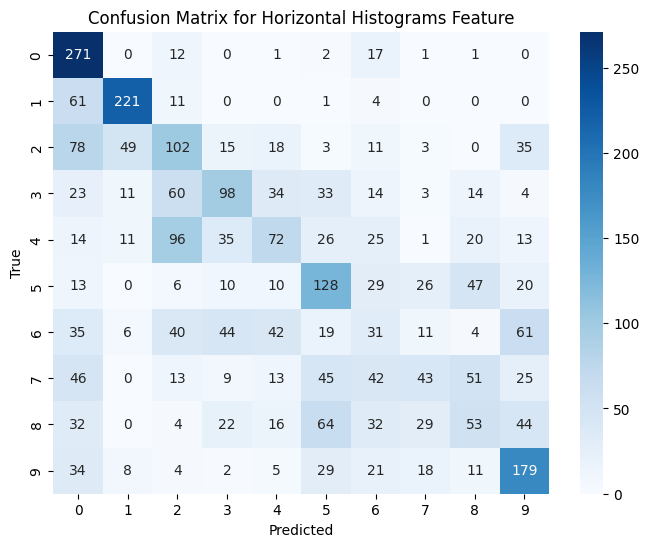

Accuracy By Nearest Mean Classifier with Vertical Histograms Feature: 0.5353333333333333


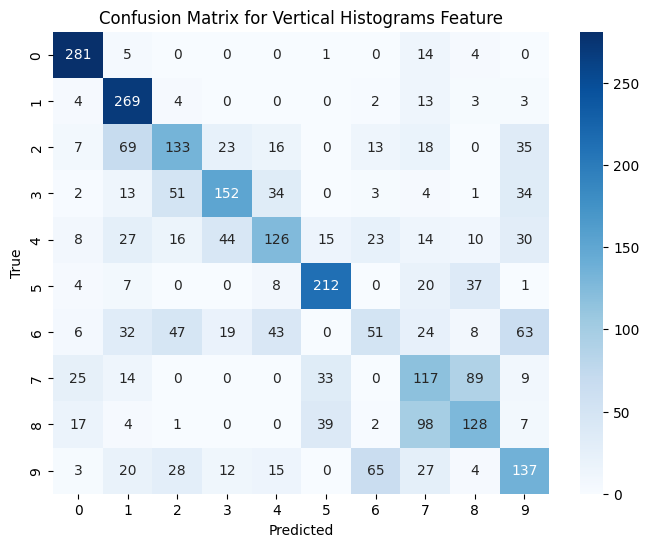

Accuracy By Nearest Mean Classifier with Zoning Feature: 0.684


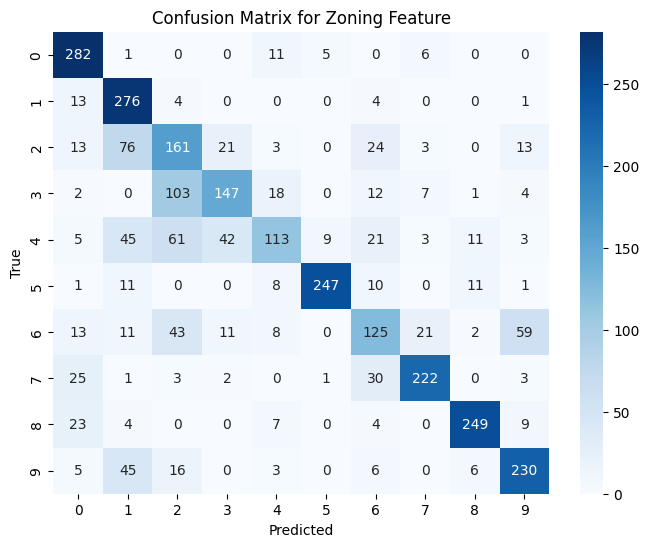

Accuracy By Nearest Mean Classifier with Wavelet Feature: 0.7233333333333334


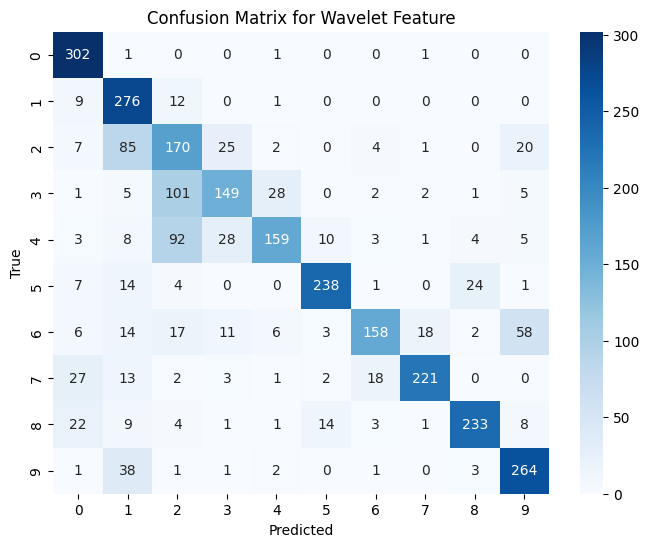

Accuracy By 1 Nearest Neighbor Classifier with Horizontal Histograms Feature: 0.5213333333333333


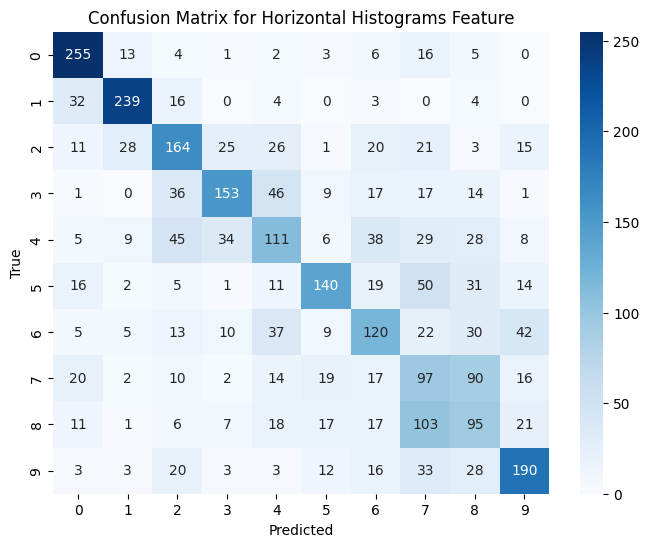

Accuracy By 1 Nearest Neighbor Classifier with Vertical Histograms Feature: 0.6436666666666667


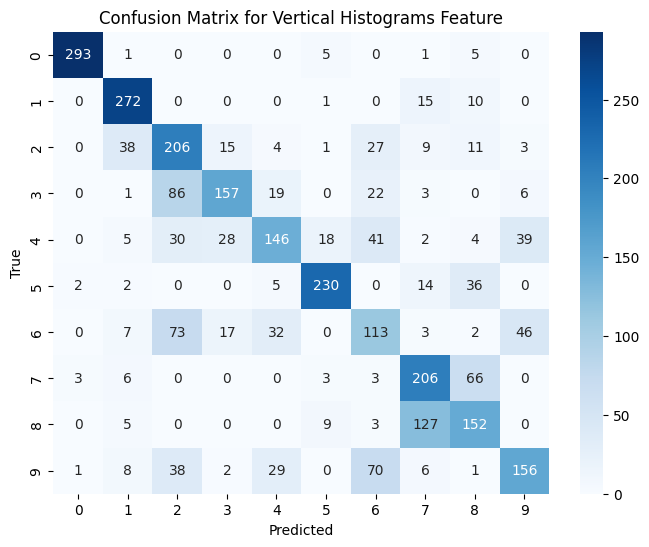

Accuracy By 1 Nearest Neighbor Classifier with Zoning Feature: 0.808


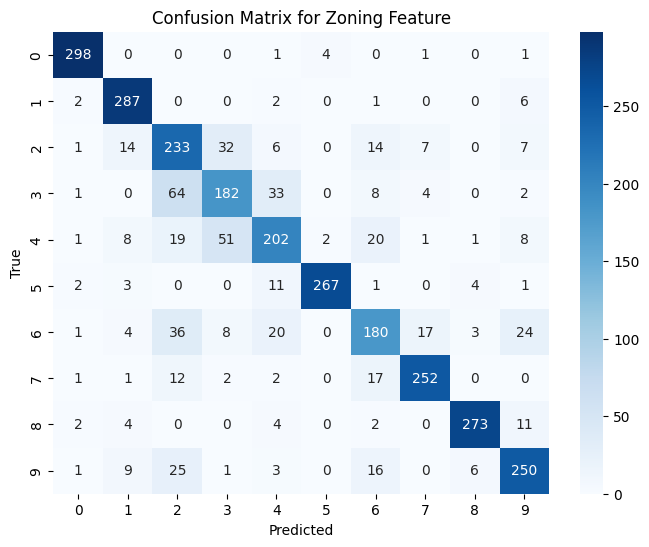

Accuracy By 1 Nearest Neighbor Classifier with Wavelet Feature: 0.8793333333333333


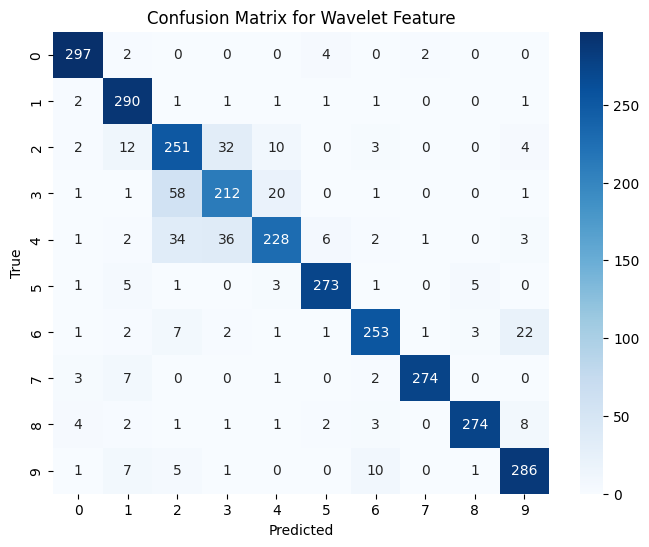

Accuracy By 5 Nearest Neighbor Classifier with Horizontal Histograms Feature: 0.562


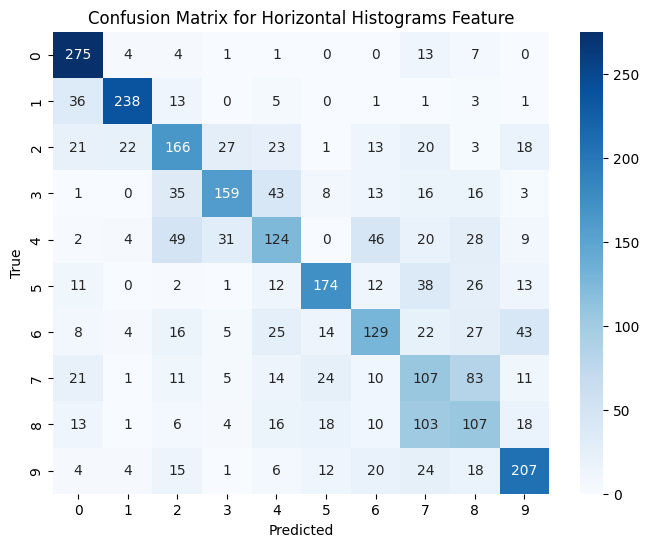

Accuracy By 5 Nearest Neighbor Classifier with Vertical Histograms Feature: 0.6666666666666666


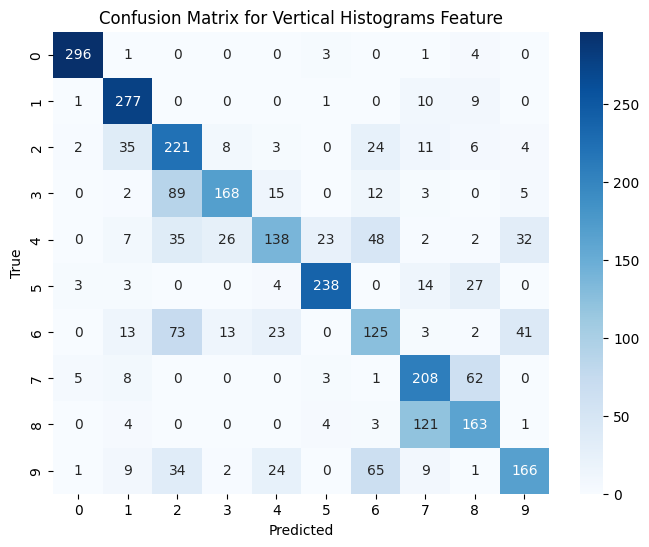

Accuracy By 5 Nearest Neighbor Classifier with Zoning Feature: 0.825


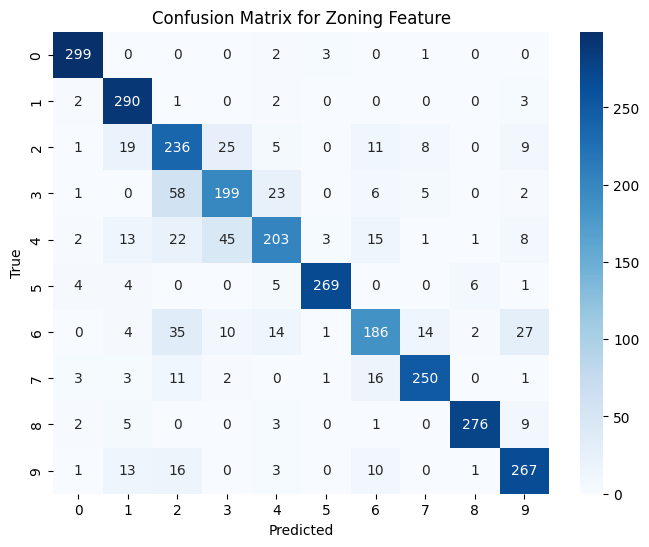

Accuracy By 5 Nearest Neighbor Classifier with Wavelet Feature: 0.8846666666666667


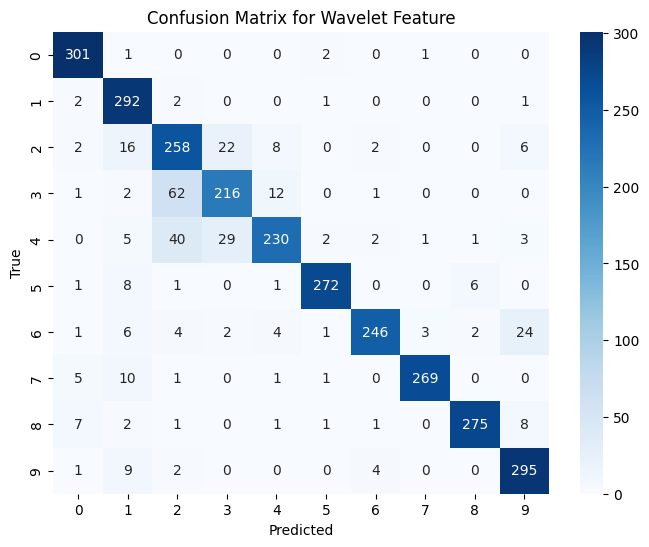

Accuracy By 9 Nearest Neighbor Classifier with Horizontal Histograms Feature: 0.5633333333333334


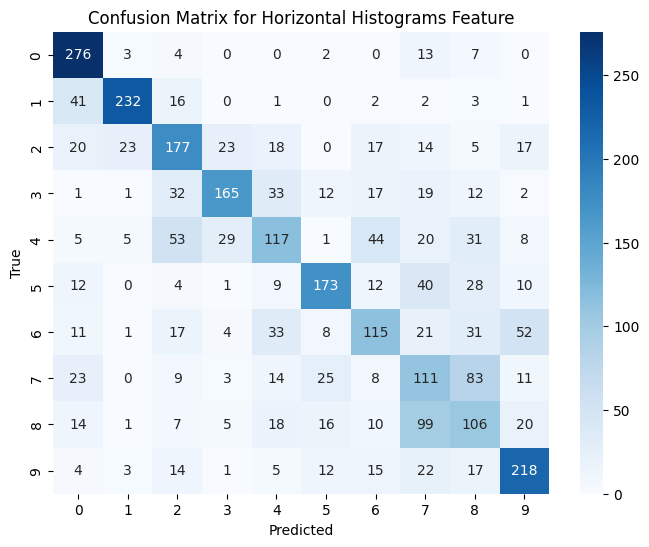

Accuracy By 9 Nearest Neighbor Classifier with Vertical Histograms Feature: 0.664


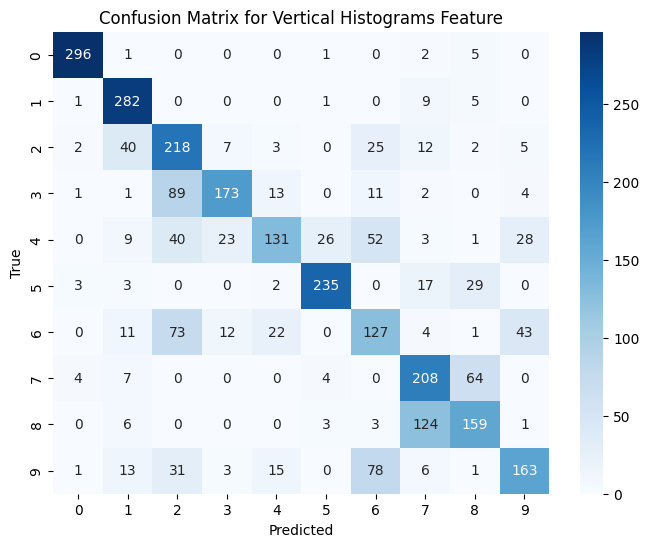

Accuracy By 9 Nearest Neighbor Classifier with Zoning Feature: 0.8216666666666667


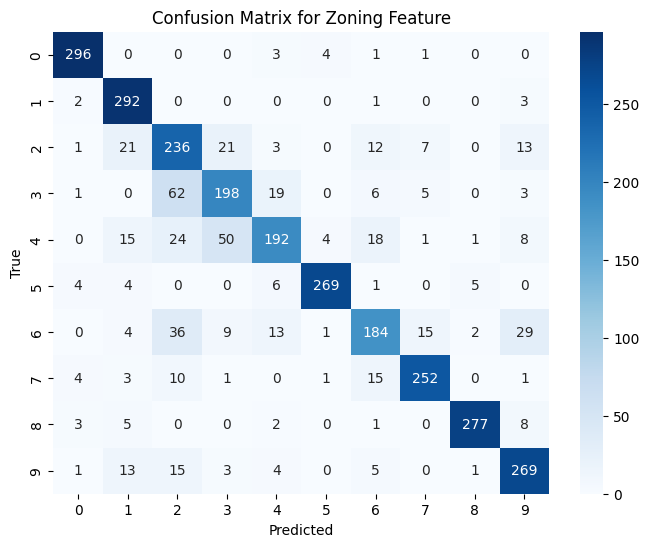

Accuracy By 9 Nearest Neighbor Classifier with Wavelet Feature: 0.8796666666666667


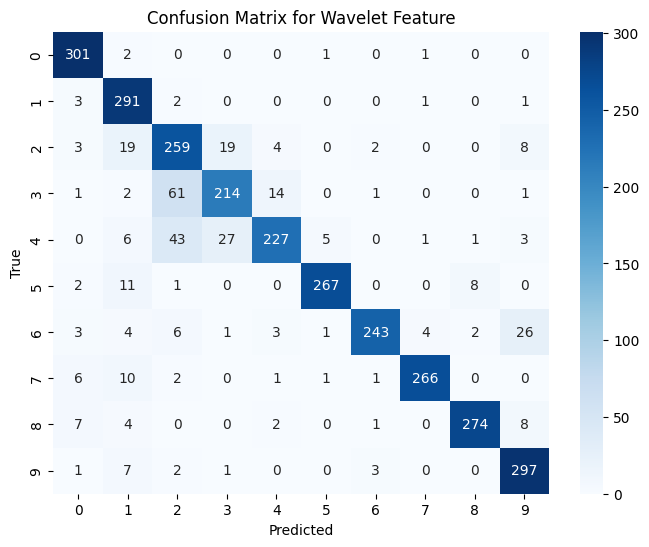

Accuracy by Gradient Boosting Classifier with Horizontal Histograms Feature: 0.163


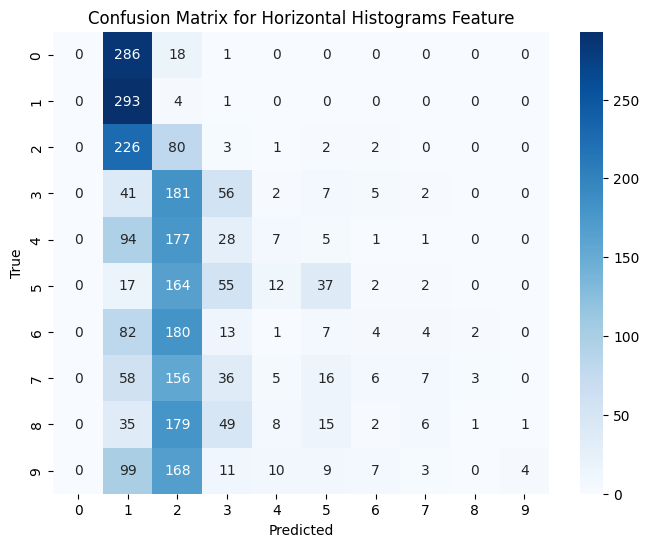

Accuracy by Gradient Boosting Classifier with Vertical Histograms Feature: 0.21466666666666667


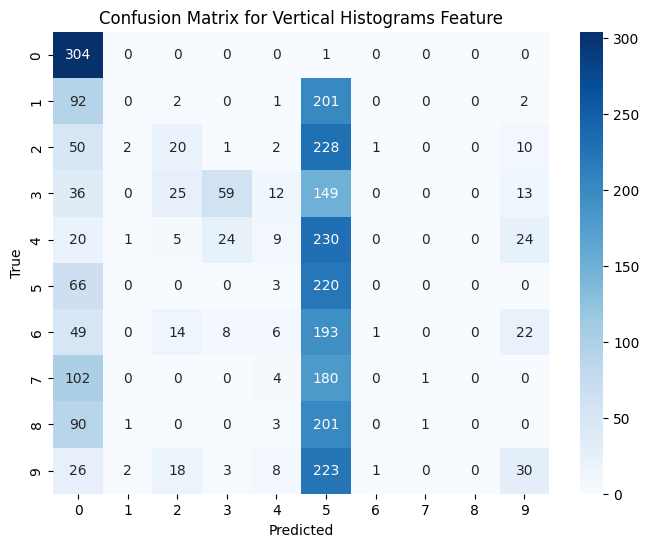

Accuracy by Gradient Boosting Classifier with Zoning Feature: 0.454


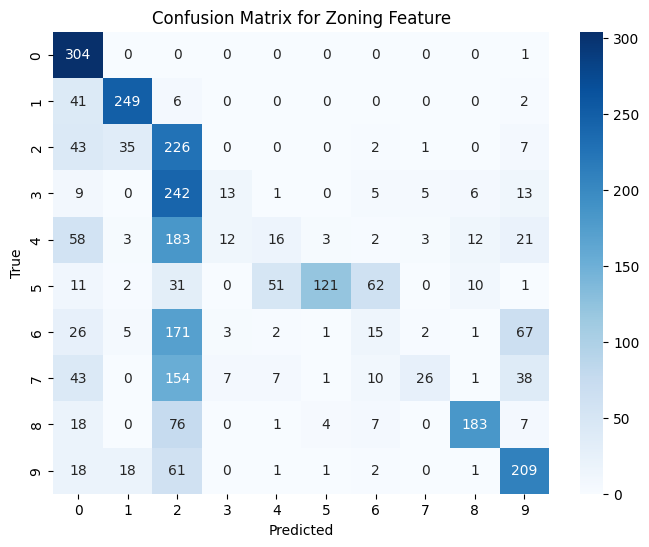

Accuracy by Gradient Boosting Classifier with Wavelet Feature: 0.49166666666666664


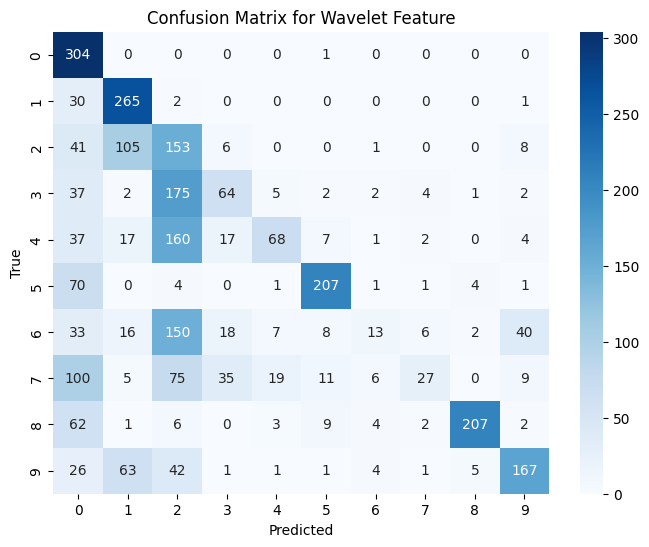

Accuracy by Parzen Window Classifier(h = 0.1) with Horizontal Histograms Feature: 0.4003333333333333


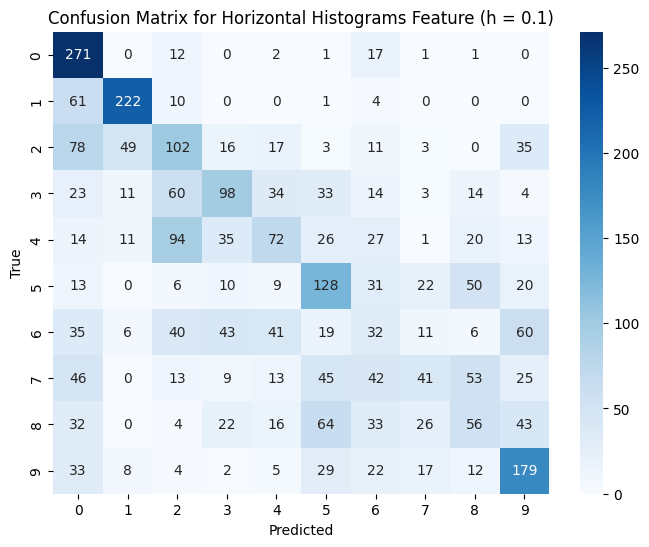

Accuracy by Parzen Window Classifier(h = 0.1) with Vertical Histograms Feature: 0.5336666666666666


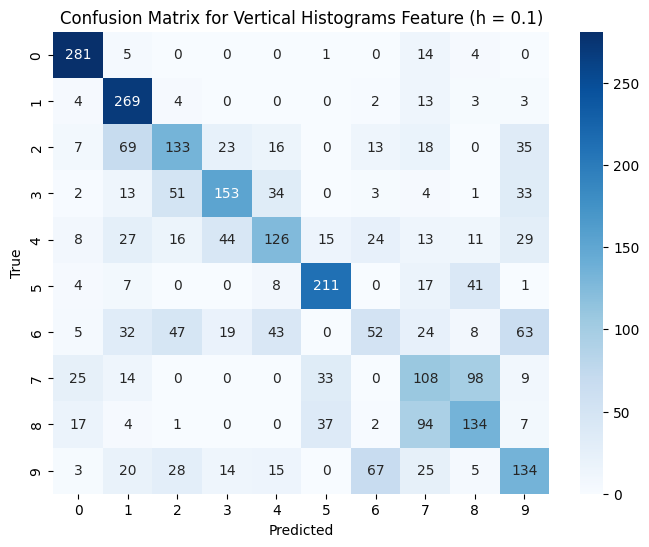

Accuracy by Parzen Window Classifier(h = 0.1) with Zoning Feature: 0.684


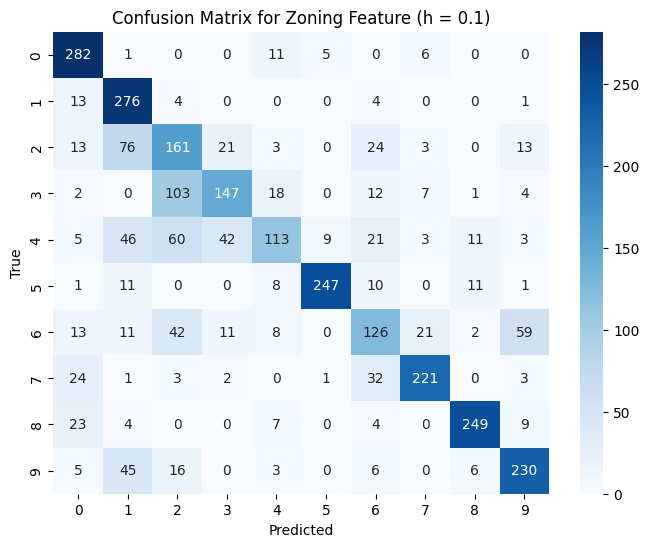

Accuracy by Parzen Window Classifier(h = 0.1) with Wavelet Feature: 0.724


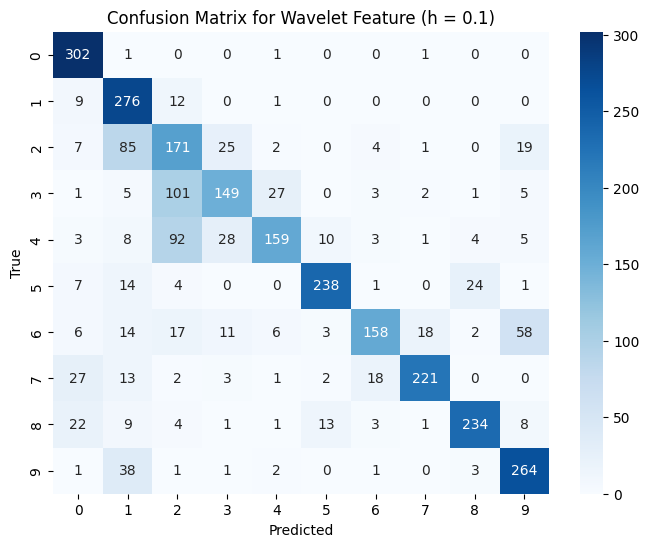

Accuracy by Parzen Window Classifier(h = 0.35) with Horizontal Histograms Feature: 0.396


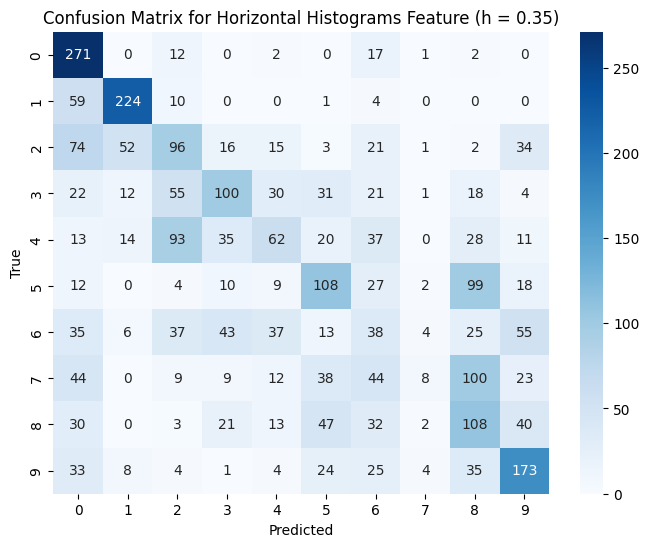

Accuracy by Parzen Window Classifier(h = 0.35) with Vertical Histograms Feature: 0.5233333333333333


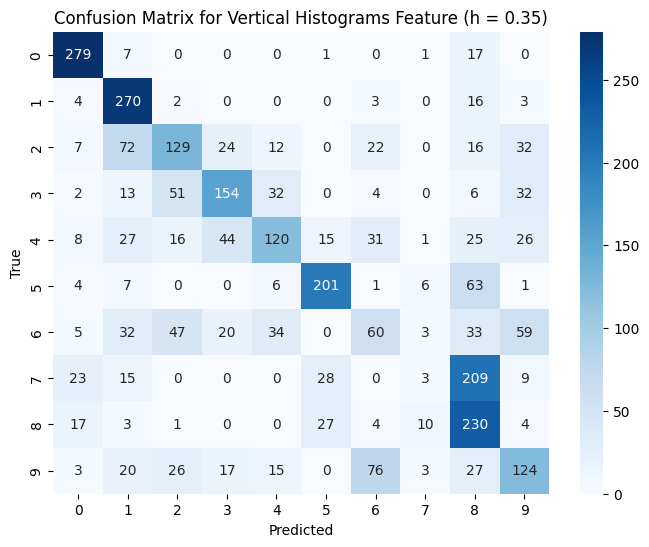

Accuracy by Parzen Window Classifier(h = 0.35) with Zoning Feature: 0.685


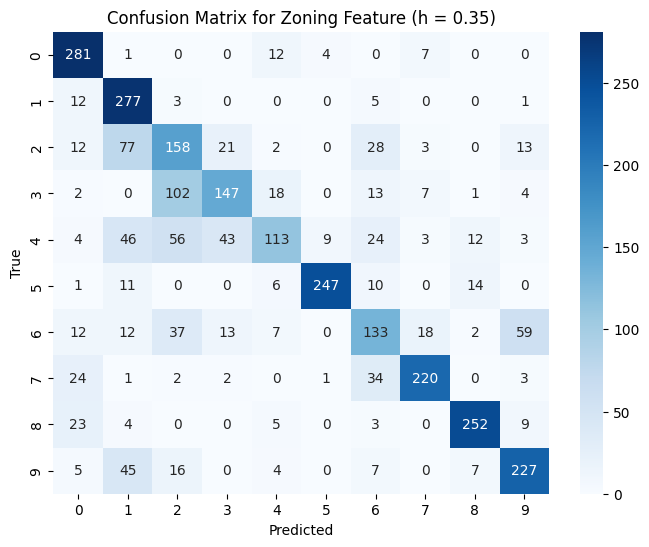

Accuracy by Parzen Window Classifier(h = 0.35) with Wavelet Feature: 0.724


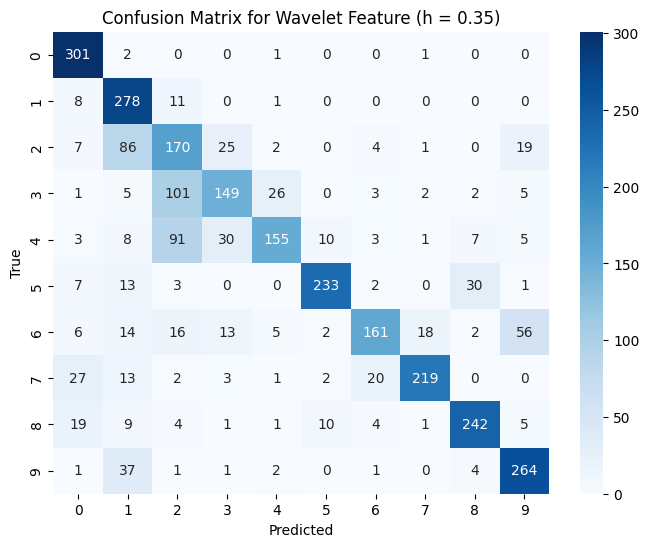

In [1]:
#  20000 train data

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

import struct
import numpy as np
import cv2


def __convert_to_one_hot(vector, num_classes):
    result = np.zeros(shape=[len(vector), num_classes])
    result[np.arange(len(vector)), vector] = 1
    return result


def __resize_image(src_image, dst_image_height, dst_image_width):
    src_image_height = src_image.shape[0]
    src_image_width = src_image.shape[1]

    if src_image_height > dst_image_height or src_image_width > dst_image_width:
        height_scale = dst_image_height / src_image_height
        width_scale = dst_image_width / src_image_width
        scale = min(height_scale, width_scale)
        img = cv2.resize(src=src_image, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    else:
        img = src_image

    img_height = img.shape[0]
    img_width = img.shape[1]

    dst_image = np.zeros(shape=[dst_image_height, dst_image_width], dtype=np.uint8)

    y_offset = (dst_image_height - img_height) // 2
    x_offset = (dst_image_width - img_width) // 2

    dst_image[y_offset:y_offset+img_height, x_offset:x_offset+img_width] = img

    return dst_image


def read_hoda_cdb(file_name):
    with open(file_name, 'rb') as binary_file:

        data = binary_file.read()

        offset = 0

        # read private header

        yy = struct.unpack_from('H', data, offset)[0]
        offset += 2

        m = struct.unpack_from('B', data, offset)[0]
        offset += 1

        d = struct.unpack_from('B', data, offset)[0]
        offset += 1

        H = struct.unpack_from('B', data, offset)[0]
        offset += 1

        W = struct.unpack_from('B', data, offset)[0]
        offset += 1

        TotalRec = struct.unpack_from('I', data, offset)[0]
        offset += 4

        LetterCount = struct.unpack_from('128I', data, offset)
        offset += 128 * 4

        imgType = struct.unpack_from('B', data, offset)[0]  # 0: binary, 1: gray
        offset += 1

        Comments = struct.unpack_from('256c', data, offset)
        offset += 256 * 1

        Reserved = struct.unpack_from('245c', data, offset)
        offset += 245 * 1

        if (W > 0) and (H > 0):
            normal = True
        else:
            normal = False

        images = []
        labels = []

        for i in range(TotalRec):

            StartByte = struct.unpack_from('B', data, offset)[0]  # must be 0xff
            offset += 1

            label = struct.unpack_from('B', data, offset)[0]
            offset += 1

            if not normal:
                W = struct.unpack_from('B', data, offset)[0]
                offset += 1

                H = struct.unpack_from('B', data, offset)[0]
                offset += 1

            ByteCount = struct.unpack_from('H', data, offset)[0]
            offset += 2

            image = np.zeros(shape=[H, W], dtype=np.uint8)

            if imgType == 0:
                # Binary
                for y in range(H):
                    bWhite = True
                    counter = 0
                    while counter < W:
                        WBcount = struct.unpack_from('B', data, offset)[0]
                        offset += 1
                        # x = 0
                        # while x < WBcount:
                        #     if bWhite:
                        #         image[y, x + counter] = 0  # Background
                        #     else:
                        #         image[y, x + counter] = 255  # ForeGround
                        #     x += 1
                        if bWhite:
                            image[y, counter:counter + WBcount] = 0  # Background
                        else:
                            image[y, counter:counter + WBcount] = 255  # ForeGround
                        bWhite = not bWhite  # black white black white ...
                        counter += WBcount
            else:
                # GrayScale mode
                data = struct.unpack_from('{}B'.format(W * H), data, offset)
                offset += W * H
                image = np.asarray(data, dtype=np.uint8).reshape([W, H]).T

            images.append(image)
            labels.append(label)

        return images, labels


def read_hoda_dataset(dataset_path, images_height=32, images_width=32, one_hot=False, reshape=True):
    images, labels = read_hoda_cdb(dataset_path)
    assert len(images) == len(labels)

    X = np.zeros(shape=[len(images), images_height, images_width], dtype=np.float32)
    Y = np.zeros(shape=[len(labels)], dtype=np.int)

    for i in range(len(images)):
        image = images[i]
        # Image resizing.
        image = __resize_image(src_image=image, dst_image_height=images_height, dst_image_width=images_width)
        # Image normalization.
        image = image / 255
        # Image binarization.
        image = np.where(image >= 0.5, 1, 0)
        # Image.
        X[i] = image
        # Label.
        Y[i] = labels[i]

    if one_hot:
        Y = __convert_to_one_hot(Y, 10).astype(dtype=np.float32)
    else:
        Y = Y.astype(dtype=np.float32)

    if reshape:
        X = X.reshape(-1, images_height * images_width)
    else:
        X = X.reshape(-1, images_height, images_width, 1)

    return X, Y

from matplotlib import pyplot as plt
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_cdb('/content/drive/MyDrive/Colab Notebooks/Train 60000.cdb')
print('Train Dataset Loaded')
print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_cdb('/content/drive/MyDrive/Colab Notebooks/Test 20000.cdb')
print('Test Dataset Loaded')



import random
train_images_subset = train_images[:3000]
train_labels_subset = train_labels[:3000]
# Select 100 elements randomly from test_images
selected_indices = random.sample(range(len(test_images)), 3000)
print(selected_indices)
# Use the selected indices to get corresponding images and labels
test_images_subset = [test_images[i] for i in selected_indices]
test_labels_subset = [test_labels[i] for i in selected_indices]


# Initialize dimensions
max_width, max_width_index = max((img.shape[0], i) for i, img in enumerate(train_images_subset + test_images_subset))
max_length, max_length_index = max((img.shape[1], i) for i, img in enumerate(train_images_subset + test_images_subset))
# Initialize the 3D train matrix
num_images = len(train_images_subset)
matrix_3d_train = np.zeros((num_images, max_width, max_length))
# Initialize the 3D test matrix
num_images1 = len(test_images_subset)
matrix_3d_test = np.zeros((num_images1, max_width, max_length))


# Fill the matrix with image data, centering each image
for i, img in enumerate(train_images_subset):
    start_row = (max_width - img.shape[0]) // 2
    start_col = (max_length - img.shape[1]) // 2
    end_row = start_row + img.shape[0]
    end_col = start_col + img.shape[1]
    matrix_3d_train[i, start_row:end_row, start_col:end_col] = img

# Now, matrix_3d is filled with image data, and each image is centered in its corresponding matrix
for i, img in enumerate(test_images_subset):
    start_row = (max_width - img.shape[0]) // 2
    start_col = (max_length - img.shape[1]) // 2
    end_row = start_row + img.shape[0]
    end_col = start_col + img.shape[1]
    matrix_3d_test[i, start_row:end_row, start_col:end_col] = img



# Calculate horizontal and vertical histograms for all images
horizontal_histograms_train = np.sum(matrix_3d_train, axis=1)
vertical_histograms_train = np.sum(matrix_3d_train, axis=2)
# Now, horizontal_histograms and vertical_histograms contain the histograms for all images
# Each row in these arrays corresponds to an image in train_images_subset
# Calculate horizontal and vertical histograms for all images
horizontal_histograms_test = np.sum(matrix_3d_test, axis=1)
vertical_histograms_test = np.sum(matrix_3d_test, axis=2)
# Now, horizontal_histograms and vertical_histograms contain the histograms for all images
# Each row in these arrays corresponds to an image in train_images_subset


def zoning(matrix):
# Initialize dimensions
    num_images, max_width, max_length = matrix.shape

# Calculate zoning feature vectors for all images
    zoning_feature_vectors = []

# Iterate over images
    for img_idx in range(num_images):
        zoning_feature_vector = []

    # Iterate over zones (5x5)
        for i in range(5):
            for j in range(5):
            # Calculate average intensity in the current zone for the current image
                avg_intensity = np.mean(matrix[img_idx,
                                                        i * max_width // 5 : (i + 1) * max_width // 5,
                                                        j * max_length // 5 : (j + 1) * max_length // 5])
                zoning_feature_vector.append(avg_intensity)

        zoning_feature_vectors.append(zoning_feature_vector)
    return zoning_feature_vectors
# Now, zoning_feature_vectors is a list containing the zoning feature vector for each image in matrix
# Each element of the list corresponds to an image
zoning_feature_vectors_train = zoning(matrix_3d_train)
zoning_feature_vectors_test = zoning(matrix_3d_test)
# Reshape zoning feature vectors to 5x5 matrices
zoning_matrices_train = [np.array(feature_vector).reshape(5, 5) for feature_vector in zoning(matrix_3d_train)]
zoning_matrices_test = [np.array(feature_vector).reshape(5, 5) for feature_vector in zoning(matrix_3d_test)]


import pywt
from skimage.transform import resize
# Function to resize each image to 64x64
def resize_images(images):
    resized_images = np.zeros((images.shape[0], 64, 64))
    for i in range(images.shape[0]):
        resized_images[i] = resize(images[i], (64, 64), mode='constant', anti_aliasing=True)
    return resized_images

# Function to extract wavelet features
def extract_wavelet_features(image):
    coeffs = pywt.wavedec2(image, 'haar', level=3)
    # Select the approximation coefficients at level 3 (8x8 image)
    features = coeffs[0].ravel()
    return features

# Resize the images
resized_images_train = resize_images(matrix_3d_train)

# Extract wavelet features for each image
wavelet_features_train = np.array([extract_wavelet_features(img) for img in resized_images_train])
# wavelet_features now contains the desired features for each image
# Its shape should be (3000, 64)
# Resize the images
resized_images_test = resize_images(matrix_3d_test)

# Extract wavelet features for each image
wavelet_features_test = np.array([extract_wavelet_features(img) for img in resized_images_test])


from sklearn.preprocessing import MinMaxScaler
# Assuming you have imported the necessary libraries and have your data loaded in the variables mentioned

# Normalizing ndarrays
scaler = MinMaxScaler()

horizontal_histograms_train = scaler.fit_transform(horizontal_histograms_train)
vertical_histograms_train = scaler.fit_transform(vertical_histograms_train)

horizontal_histograms_test  = scaler.fit_transform(horizontal_histograms_test)
vertical_histograms_test = scaler.fit_transform(vertical_histograms_test)

wavelet_features_train = scaler.fit_transform(wavelet_features_train)
wavelet_features_test = scaler.fit_transform(wavelet_features_test)

# Normalizing lists
zoning_feature_vectors_train = [scaler.fit_transform(np.array(vec).reshape(-1, 1)) for vec in zoning_feature_vectors_train]
zoning_feature_vectors_test = [scaler.fit_transform(np.array(vec).reshape(-1, 1)) for vec in zoning_feature_vectors_test]


class NearestMeanClassifier:
    def __init__(self):
        self.class_means = None

    def fit(self, X, y):
        unique_classes = np.unique(y)
        self.class_means = {}

        for class_label in unique_classes:
            class_instances = X[y == class_label]
            class_mean = np.mean(class_instances, axis=0)
            self.class_means[class_label] = class_mean

    def predict(self, X):
        if self.class_means is None:
            raise RuntimeError("The classifier has not been trained. Call fit() first.")

        predictions = []
        for instance in X:
            nearest_class = min(self.class_means.keys(), key=lambda x: np.linalg.norm(instance - self.class_means[x]))
            predictions.append(nearest_class)

        return np.array(predictions)

# Example usage:
# Assuming X_train, y_train, X_test are your training features, training labels, and test features
# X_train and X_test should be NumPy arrays

def NMC(FTr, LTr, FTe, LTe, str):
    # Create and train the classifier
    classifier = NearestMeanClassifier()
    classifier.fit(FTr, LTr)

    # Make predictions on the test set
    predictions = classifier.predict(FTe)

    # Evaluate the accuracy or other metrics
    accuracy = np.mean(predictions == LTe)
    print(f"Accuracy By Nearest Mean Classifier with {str}: {accuracy}")

    # Plot confusion matrix
    cm = confusion_matrix(LTe, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.class_means.keys(), yticklabels=classifier.class_means.keys())
    plt.title(f'Confusion Matrix for {str}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

NMC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature')
NMC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature')
NMC(np.array(zoning_feature_vectors_train), train_labels_subset, np.array(zoning_feature_vectors_test), test_labels_subset, 'Zoning Feature')
NMC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature')


from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

def KNNC(FTr, LTr, FTe, LTe, str, k=3):
    # Create KNN classifier
    knn = KNN(k)
    knn.fit(FTr, LTr)

    # Make predictions
    predictions = knn.predict(FTe)

    # Evaluate the accuracy or other metrics
    accuracy = np.mean(predictions == LTe)
    print(f"Accuracy By {k} Nearest Neighbor Classifier with {str}: {accuracy}")

    # Plot confusion matrix
    cm = confusion_matrix(LTe, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(LTe), yticklabels=np.unique(LTe))
    plt.title(f'Confusion Matrix for {str}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

KNNC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature', 1)
KNNC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature', 1)
KNNC(np.array(zoning_feature_vectors_train), train_labels_subset, np.array(zoning_feature_vectors_test), test_labels_subset, 'Zoning Feature', 1)
KNNC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature', 1)

KNNC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature', 5)
KNNC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature', 5)
KNNC(np.array(zoning_feature_vectors_train), train_labels_subset, np.array(zoning_feature_vectors_test), test_labels_subset, 'Zoning Feature', 5)
KNNC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature', 5)

KNNC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature', 9)
KNNC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature', 9)
KNNC(np.array(zoning_feature_vectors_train), train_labels_subset, np.array(zoning_feature_vectors_test), test_labels_subset, 'Zoning Feature', 9)
KNNC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature', 9)


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
def GBC(FTr, LTr, FTe, LTe, str):
    # Create a Gradient Boosting Classifier
    model = GaussianNB()

    # Train the model on the training set
    model.fit(FTr, LTr)

    # Make predictions on the testing set
    y_pred = model.predict(FTe)

    # Evaluate the performance of the classifier
    accuracy = metrics.accuracy_score(LTe, y_pred)
    print(f"Accuracy by Gradient Boosting Classifier with {str}: {accuracy}")

    # Plot confusion matrix
    cm = confusion_matrix(LTe, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {str}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


GBC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature')
GBC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature')
GBC(np.array(zoning_feature_vectors_train).reshape(len(zoning_feature_vectors_train), -1), train_labels_subset, np.array(zoning_feature_vectors_test).reshape(len(zoning_feature_vectors_test), -1), test_labels_subset, 'Zoning Feature')
GBC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature')


from scipy.stats import multivariate_normal

class ParzenWindowClassifier:
    def __init__(self, h=1.0):
        self.h = h  # Bandwidth parameter

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = np.unique(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        likelihoods = []

        for c in self.classes:
            class_indices = np.where(self.y_train == c)[0]
            class_data = self.X_train[class_indices]

            # Calculate the Parzen window estimate for the class
            likelihood = np.sum(self._parzen_window(x, class_data)) / len(class_data)
            likelihoods.append(likelihood)

        # Return the class with the highest likelihood
        predicted_class = self.classes[np.argmax(likelihoods)]
        return predicted_class

    def _parzen_window(self, x, data):
        # Use a multivariate normal distribution as the window function
        window_function = multivariate_normal(mean=np.mean(data, axis=0), cov=np.eye(data.shape[1]) * self.h**2)
        return window_function.pdf(x)

def PWC(FTr, LTr, FTe, LTe, str, h=1.0):
    # Create Parzen Window classifier
    parzen_classifier = ParzenWindowClassifier(h)
    parzen_classifier.fit(FTr, LTr)

    # Make predictions
    y_pred = parzen_classifier.predict(FTe)

    # Evaluate the performance of the classifier
    accuracy = metrics.accuracy_score(LTe, y_pred)
    print(f"Accuracy by Parzen Window Classifier(h = {h}) with {str}: {accuracy}")

    # Plot confusion matrix
    cm = confusion_matrix(LTe, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=parzen_classifier.classes, yticklabels=parzen_classifier.classes)
    plt.title(f'Confusion Matrix for {str} (h = {h})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


PWC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature', 0.1)
PWC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature', 0.1)
PWC(np.array(zoning_feature_vectors_train).reshape(len(zoning_feature_vectors_train), -1), train_labels_subset, np.array(zoning_feature_vectors_test).reshape(len(zoning_feature_vectors_test), -1), test_labels_subset, 'Zoning Feature', 0.1)
PWC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature', 0.1)


PWC(horizontal_histograms_train, train_labels_subset, horizontal_histograms_test, test_labels_subset, 'Horizontal Histograms Feature', 0.35)
PWC(vertical_histograms_train, train_labels_subset, vertical_histograms_test, test_labels_subset, 'Vertical Histograms Feature', 0.35)
PWC(np.array(zoning_feature_vectors_train).reshape(len(zoning_feature_vectors_train), -1), train_labels_subset, np.array(zoning_feature_vectors_test).reshape(len(zoning_feature_vectors_test), -1), test_labels_subset, 'Zoning Feature', 0.35)
PWC(wavelet_features_train, train_labels_subset, wavelet_features_test, test_labels_subset, 'Wavelet Feature', 0.35)

